<a href="https://colab.research.google.com/github/sameehaafr/sigai-tsf/blob/master/Copy_of_sig_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

File Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

Data Preprocessing

In [ ]:
la_2020 = pd.read_csv('/content/gdrive/MyDrive/SIGAI TSF/DATA/LA_pm10_2020.csv')
la_2021 = pd.read_csv('/content/gdrive/MyDrive/SIGAI TSF/DATA/LA_pm10_2021.csv')
la_2022 = pd.read_csv('/content/gdrive/MyDrive/SIGAI TSF/DATA/LA_pm10_2022.csv')

In [ ]:
la_2022

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/05/2022,AQS,60370002,2,28,ug/m3 SC,26,Azusa,1,100.0,81102,PM10 Total 0-10um STP,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.136500,-117.923910
1,01/11/2022,AQS,60370002,2,18,ug/m3 SC,17,Azusa,1,100.0,81102,PM10 Total 0-10um STP,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.136500,-117.923910
2,01/17/2022,AQS,60370002,2,19,ug/m3 SC,18,Azusa,1,100.0,81102,PM10 Total 0-10um STP,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.136500,-117.923910
3,01/27/2022,AQS,60370002,2,16,ug/m3 SC,15,Azusa,1,100.0,81102,PM10 Total 0-10um STP,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.136500,-117.923910
4,01/29/2022,AQS,60370002,2,15,ug/m3 SC,14,Azusa,1,100.0,81102,PM10 Total 0-10um STP,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.136500,-117.923910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,09/26/2022,AQS,60379033,2,28,ug/m3 SC,26,Lancaster-Division Street,1,100.0,81102,PM10 Total 0-10um STP,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.669739,-118.130511
1494,09/27/2022,AQS,60379033,2,30,ug/m3 SC,28,Lancaster-Division Street,1,100.0,81102,PM10 Total 0-10um STP,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.669739,-118.130511
1495,09/28/2022,AQS,60379033,2,35,ug/m3 SC,32,Lancaster-Division Street,1,100.0,81102,PM10 Total 0-10um STP,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.669739,-118.130511
1496,09/29/2022,AQS,60379033,2,37,ug/m3 SC,34,Lancaster-Division Street,1,100.0,81102,PM10 Total 0-10um STP,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.669739,-118.130511


We're focusing on building a model that uses previous values of a unit to predict that unit (PM10).

The columns that matter here are "Date" and "Daily Mean PM10 Concentration".

The training data can be 2020 and 2021 values, and we can use 2022 as validation.


In [ ]:
# subsetting
la_2020 = la_2020[['Date', 'Daily Mean PM10 Concentration']]
la_2021 = la_2021[['Date', 'Daily Mean PM10 Concentration']]
la_2022 = la_2022[['Date', 'Daily Mean PM10 Concentration']]
print(len(la_2020)+len(la_2021)+len(la_2022))

3427


In [ ]:
# converting all to datetime
la_2020['Date'] = pd.to_datetime(la_2020['Date'])
la_2021['Date'] = pd.to_datetime(la_2021['Date'])
la_2022['Date'] = pd.to_datetime(la_2022['Date'])

<ipython-input-6-22adbb8af597>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_2020['Date'] = pd.to_datetime(la_2020['Date'])
<ipython-input-6-22adbb8af597>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_2021['Date'] = pd.to_datetime(la_2021['Date'])
<ipython-input-6-22adbb8af597>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [ ]:
# merging
la_pm10 = pd.concat([la_2020, la_2021, la_2022])
la_pm10.rename(columns = {'Daily Mean PM10 Concentration':'daily_pm10'}, inplace = True)
print(len(la_pm10))

3427


In [ ]:
# dropping null cols
la_pm10 = la_pm10.dropna()

# date to datetime
#la_pm10['Date'] = pd.to_datetime(la_pm10['Date'])

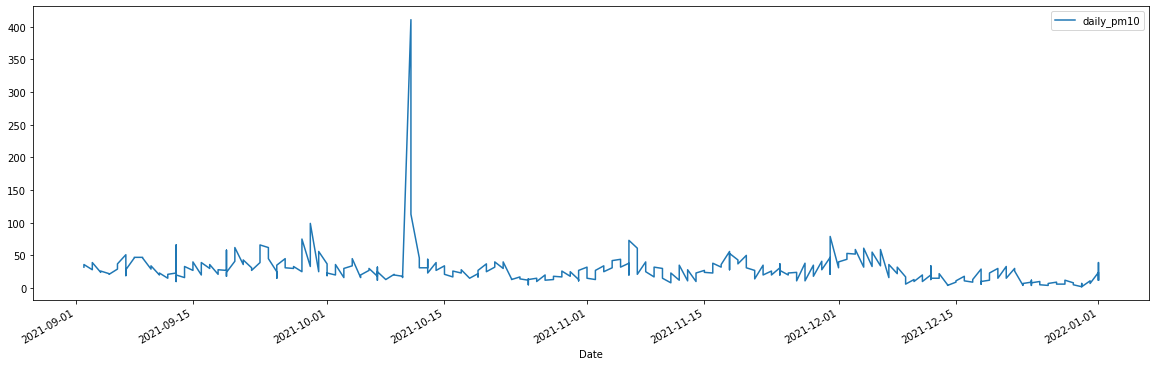

In [ ]:
range = la_pm10[(la_pm10['Date'] > '2021-09-01') & (la_pm10['Date'] <= '2022-01-01')]
plt.rcParams["figure.figsize"] = (20, 6)
range.plot(x='Date', y='daily_pm10')
plt.show()

In [ ]:
# finding row with max pm10 value
la_pm10.loc[(la_pm10['daily_pm10'] == max(la_pm10['daily_pm10']))]

,Date,daily_pm10
906,2021-10-11,411


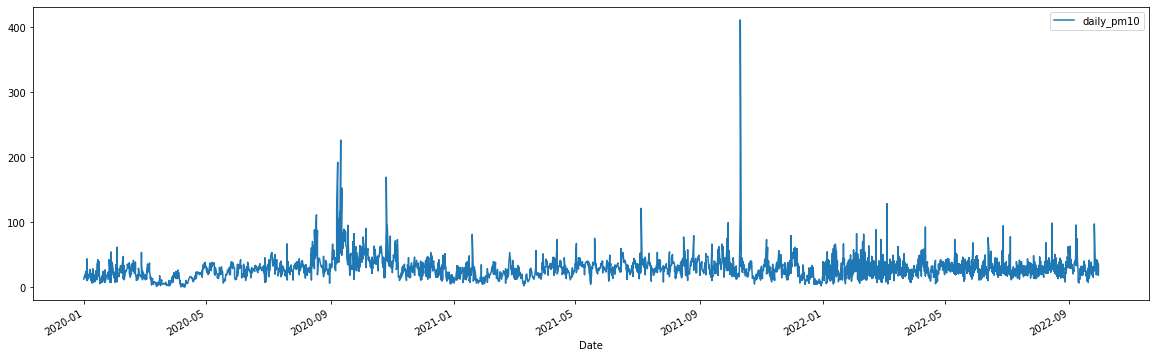

In [ ]:
plt.rcParams["figure.figsize"] = (20, 6)
la_pm10.plot(x='Date', y='daily_pm10')
plt.show()

should we remove the 411 value?

In [ ]:
#normalizing
la_pm10['daily_pm10'] = (la_pm10['daily_pm10'] - la_pm10['daily_pm10'].mean()) / la_pm10['daily_pm10'].std()

In [ ]:
#groups data by month

import pandas as pd
# sample data
df = pd.DataFrame(pd.date_range({('date':'2020-01-01', '2020-01-31')}, columns=['date', 'daily_pm10'])
# groupby your key and freq
g = df.groupby(pd.Grouper(key='date', freq='M'))
# groups to a list of dataframes with list comprehension
dfs = [group for x, group in g]

h = df.groupby(df.date.dt.month)['Daily Mean PM10 Concentration'].sum()


#dfs.mean(axis = 1, skipna = False)

ValueError: ignored

In [ ]:
dfs

[   daily_pm10
 0  2020-01-01
 1  2020-01-02
 2  2020-01-03
 3  2020-01-04
 4  2020-01-05
 5  2020-01-06
 6  2020-01-07
 7  2020-01-08
 8  2020-01-09
 9  2020-01-10
 10 2020-01-11
 11 2020-01-12
 12 2020-01-13
 13 2020-01-14
 14 2020-01-15
 15 2020-01-16
 16 2020-01-17
 17 2020-01-18
 18 2020-01-19
 19 2020-01-20
 20 2020-01-21
 21 2020-01-22
 22 2020-01-23
 23 2020-01-24
 24 2020-01-25
 25 2020-01-26
 26 2020-01-27
 27 2020-01-28
 28 2020-01-29
 29 2020-01-30
 30 2020-01-31]

Data Splitting

We don't want to randomly split the data since this forecasting is dependent on time. So, we want to split it sequentially. 

Training: 2020 and 2021 vals

Rolling Window Split

In [ ]:
window_size = 10
target_size = 5

In [ ]:
X_sequences = []
y_sequences = []

In [ ]:
la_pm10

,Date,daily_pm10
0,2020-01-04,-0.193946
1,2020-01-10,-0.501314
2,2020-01-16,0.236370
3,2020-01-22,-0.439841
4,2020-01-28,-0.316893
...,...,...
1493,2022-09-26,-0.009525
1494,2022-09-27,0.113422
1495,2022-09-28,0.420790
1496,2022-09-29,0.543738


Data Split

In [ ]:
# one way of data splitting
# X = la_pm10['Date']
# y = la_pm10['daily_pm10']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)

Model Building

In [ ]:
# another way of data splitting
train_df, test_df = train_test_split(la_pm10, test_size=0.2, shuffle = False)

In [ ]:
# define the model
model = Sequential()
model.add(LSTM(50, input_shape=(train_df.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

Model Fitting

In [ ]:
# X_train = np.asarray(X_train).astype(np.float32)
# y_train = np.asarray(y_train).astype(np.float32)
# X_test = np.asarray(X_test).astype(np.float32)
# y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
# print(X_train.shape, y_train.shape, train_df.shape[0], train_df.shape[1])

(2741,) (2741,) 2741 2


In [ ]:
train_df

,Date,daily_pm10
0,2020-01-04,-0.193946
1,2020-01-10,-0.501314
2,2020-01-16,0.236370
3,2020-01-22,-0.439841
4,2020-01-28,-0.316893
...,...,...
807,2022-06-12,-0.685735
808,2022-06-13,-0.808683
809,2022-06-14,0.297843
810,2022-06-15,0.605211


In [ ]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [ ]:
train_df = np.array(train_df)
test_df = np.array(test_df)

In [ ]:
train_df

array([[Timestamp('2020-01-04 00:00:00'), -0.19394604800174764],
       [Timestamp('2020-01-10 00:00:00'), -0.5013142992512802],
       [Timestamp('2020-01-16 00:00:00'), 0.23636950374759796],
       ...,
       [Timestamp('2022-06-14 00:00:00'), 0.2978431539975045],
       [Timestamp('2022-06-15 00:00:00'), 0.6052114052470371],
       [Timestamp('2022-06-16 00:00:00'), 0.5437377549971305]],
      dtype=object)

In [ ]:
timestamps = np.array([row[0] for row in input_data])

NameError: ignored

In [ ]:
# pandas library to convert the timestamp to datetime64[ns] and then convert it to numpy array
model.fit(train_df, epochs = 100, batch_size = 30)


ValueError: ignored